In [2]:
#Conda env: py_3916

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import imblearn


#Import your modules
#---------------------------------------
import plaque_f as pf

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.9.16 (main, Jan 11 2023, 16:05:54) \n[GCC 11.2.0]'

# Load data

In [16]:
def run_(name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/old/' + name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/filtered_feature_bc_matrix.h5'
    meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/old/allspots_meta.csv') #FILTERED
    meta_filt = meta[meta['sample'] == name]

    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, 
                                    meta_filt, min_cell_per_gene=100, norm_factor=1e6)
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [ ]:
name = '030-D'
spot_df, gene_df = run_(name)

In [13]:
spot_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,anot
120914,AAACAAGTATCTCCCA-1,1,50,102,409,1492,0,17,Piriform Cortex
120915,AAACAATCTACTAGCA-1,1,3,43,1046,615,0,12,Fiber Tracts 2
120916,AAACAGAGCGACTCCT-1,1,14,94,497,819,0,2,CA1/Other HPF
120917,AAACAGTGTTCCTGGG-1,1,73,43,1041,1924,0,7,Cortex Layer 2/3
120918,AAACATTTCCCGGATT-1,1,61,97,461,1697,0,17,Piriform Cortex
...,...,...,...,...,...,...,...,...,...
124291,TTGTTTCACATCCAGG-1,1,58,42,1053,1644,0,1,Cortex Layer 5/6a
124292,TTGTTTCATTAGTCTA-1,1,60,30,1182,1682,0,7,Cortex Layer 2/3
124293,TTGTTTCCATACAACT-1,1,45,27,1215,1401,0,7,Cortex Layer 2/3
124294,TTGTTTGTATTACACG-1,1,73,41,1062,1924,0,7,Cortex Layer 2/3


In [14]:
gene_df

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Gm16367,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,214.500214,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.000137
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.727539
AAACAGTGTTCCTGGG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,35.817902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,286.543213
AAACATTTCCCGGATT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,96.331696,38.532677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.326782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,73.545631,36.772816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.409698
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,38.836460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.691681
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,68.051895,113.419830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.471725
TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.584091


In [10]:
#group data together
name_l = '030-B', '030-C', '040-A', '040-C', '040-D'

for name in name_l:
    spot_df, gene_df = run_(name)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = spot_df['plaque']
    else: 
        gene_all = np.vstack((gene_all, np.asarray(gene_df)))
        lab = np.hstack((lab, spot_df['plaque']))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3532
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3465
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3616
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3457
Number of genes: 32284


In [11]:
gene_all.shape, lab.shape

((17009, 32284), (17009,))

In [12]:
#Ascertain class imbalance
u = np.unique(lab,return_counts=True)
print(str(np.round(u[1][1]/sum(u[1]) * 100)) + '% of spots are plaque')

1.0% of spots are plaque


# Build classifier



In [14]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11396, 32284), (5613, 32284), (11396,), (5613,))

In [170]:
#Random under sampling 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11269, 1: 127})
Resample dataset shape Counter({0: 127, 1: 127})


In [185]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.758 , 4257 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.757 , 4210 of 5562
ACCURACY (#correct predictions/#total predictions) plaque = 0.92 , 47 of 51
PRECISION (TP/TP+FP) non-plaque = 0.999
PRECISION (TP/TP+FP) plaque= 0.034
RECALL (TP/TP+FN) Non-plaque = 0.757
RECALL (TP/TP+FN) plaque = 0.922
F1 SCORE(2*(PR/P+R)) non-plaque = 0.861
F1 SCORE (2*(PR/P+R)) plaque = 0.065
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.757
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.922
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.078
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.243
ROC AUC non-plaque = 0.914
ROC AUC plaque = 0.914


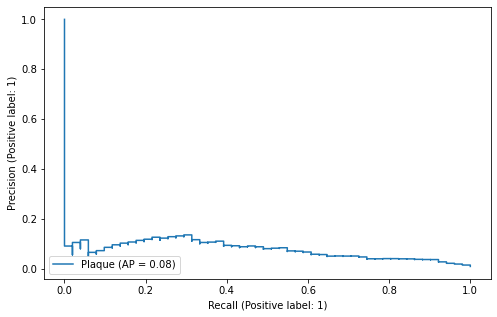

In [172]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

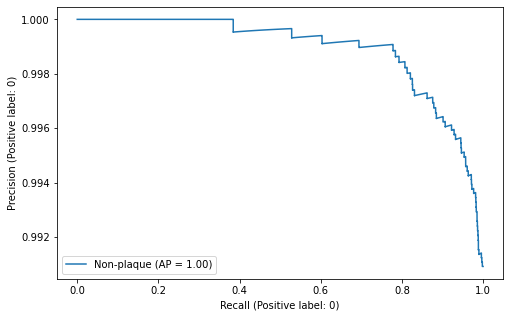

In [174]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Non-plaque", pos_label=0, ax=ax)
plt.show()

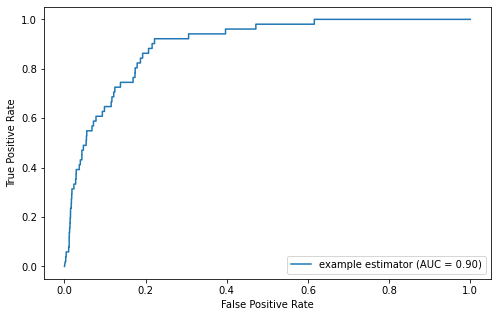

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(true, pred_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
#set display size
plt.rcParams["figure.figsize"] = (8,5)
display.plot()
plt.show()

In [15]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11396, 32284), (5613, 32284), (11396,), (5613,))

In [226]:
# combine over and undersampling 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy=0.05)# fit predictor and target variable
rus = RandomUnderSampler(replacement=False)# fit predictor and target variable
pipeline = Pipeline(steps=[('ros', ros), ('rus', rus)])
X_mix, y_mix = pipeline.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_mix))

#mix_pred = pipeline.predict(X_test)

Original dataset shape: Counter({0: 11271, 1: 125})
Resample dataset shape Counter({0: 563, 1: 563})


In [227]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.93 , 5220 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.933 , 5187 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.62 , 33 of 53
PRECISION (TP/TP+FP) non-plaque = 0.996
PRECISION (TP/TP+FP) plaque= 0.081
RECALL (TP/TP+FN) Non-plaque = 0.933
RECALL (TP/TP+FN) plaque = 0.623
F1 SCORE(2*(PR/P+R)) non-plaque = 0.963
F1 SCORE (2*(PR/P+R)) plaque = 0.144
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.933
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.623
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.377
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.067
ROC AUC non-plaque = 0.91
ROC AUC plaque = 0.91


In [224]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.963 , 5405 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.969 , 5385 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.38 , 20 of 53
PRECISION (TP/TP+FP) non-plaque = 0.994
PRECISION (TP/TP+FP) plaque= 0.103
RECALL (TP/TP+FN) Non-plaque = 0.969
RECALL (TP/TP+FN) plaque = 0.377
F1 SCORE(2*(PR/P+R)) non-plaque = 0.981
F1 SCORE (2*(PR/P+R)) plaque = 0.161
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.969
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.377
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.623
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.031
ROC AUC non-plaque = 0.912
ROC AUC plaque = 0.912


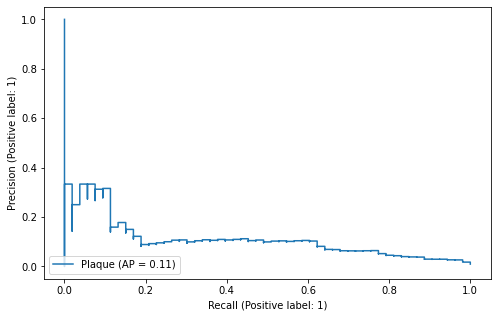

In [228]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [ ]:

#Check top n DE genes -> 100? 
gene_all

In [ ]:
# Splitting -> cross validation -> tune some hyperparameters


In [ ]:
# Try out a different model? 

In [151]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.744 , 4127 of 5545
Plaque accuracy = 0.93 , 63 of 68


In [138]:
accuracy = sklearn.metrics.balanced_accuracy_score(true, pred)
accuracy

0.8353723545324352

In [51]:
#find the top n PCs of gene data
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(gene_all)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

8


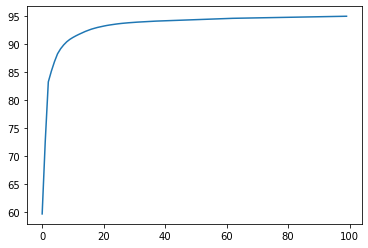

In [52]:
minpc = np.where(var1 > 90)[0][0]
print(minpc)
plt.plot(var1)
plt.show()

In [29]:
lab.shape, gene_all.shape

((17009,), (17009, 32284))

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_sc = scaler.fit_transform(gene_all)

#find the top n PCs of gene data
pca = PCA(n_components=8)
pca.fit(X_sc)
X_pc = pca.transform(X_sc)


In [111]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pc, lab, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11396, 8), (11396,), (5613, 8), (5613,))

In [112]:
#Random under sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11273, 1: 123})
Resample dataset shape Counter({0: 123, 1: 123})


In [114]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.706 , 3923 of 5558
Plaque accuracy = 0.87 , 48 of 55


In [67]:
sum(true[np.where(true==1)] == pred[np.where(true==1)]) 

3

In [41]:
np.unique(true)

array([0, 1])

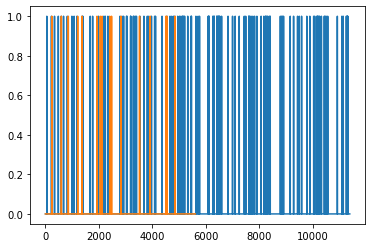

In [49]:
plt.plot(y_train)
plt.plot(pred)